## Fourier Decomposition

Consider a signal $s(t)$ periodic with period $T$.

Fourier analysis says that $s(t)$ can be expressed as a linear combination of sinusoids with smaller periods $T/n$. 

$$s(t) = \sum_{n=-\infty}^\infty A_n \exp\left(2\pi j \frac{n t}{T}\right)$$

where $\exp\left(2\pi j \frac{n t}{T}\right)$ is a sinusoid and $A_n$ is the weight of that sinusoid.

Intuitively this decomposition sounds plausible. If $s(t)$ is periodic, its components must also be periodic. Here, this set of sinusoids contains all the sinusoids that are periodic in $T$. 

## Fourier Basis Functions
Expressing a signal $s(t)$ as an infinite sum of sinusoids is not meaningful if we cannot find the coefficient $A_n$ of each of those basis sinusoids.

Fortunately, we noticed that the inner product between basis sinusoids are 0 if they are different and 1 if they are the same. We call this property the **orthoganality** of the basis sinusoids.

$$\frac{1}{T}\int_0^T \left[\exp\left(2\pi j \frac{n t}{T}\right)\right] \left[\exp\left(-2\pi j \frac{m t}{T}\right)\right] dt  = \frac{1}{T}\int_0^T \exp\left(2\pi j \frac{(n-m)t}{T}\right) = \delta_{nm} $$ 

If we exploit this orthoganality, we can extract the coefficient of a basis sinusoid (up to some normalization).

$$A_n = \int_0^T s(t)\exp\left(-2\pi j \frac{nt}{T}\right) dt $$

In other words, fourier decomposition is special because the components coefficients can be uniquely determined.

## Completeness of Fourier Basis

Depending on whether you had studied the fourier series before, it may strike you as surprising that any arbitray periodic waveform can be decomposed into sinusoids. If I had a periodic waveform with spiking amplitudes, can it still be decomposed into sinusoids of constant amplitudes?

In other words, we are asking if it is possible to find a periodic signal $s(t)$ that cannot be written as such a decomposition.

The answer is no.

The fourier basis spans all of the periodic signal space. The fourier basis is **complete**. 

But let's leave the completeness proof till another time. 


## Fourier Transform
The Fourier Transform generalizes this decomposition to non-periodic signals. It does so by extending the period $T$ to $\infty$. 

As the period of the signal tends to infinity, the basis sinusoids becomes more closely separated in frequency space. In the limit of infinite period, sinusoids of every frequency $f$ is a basis sinusoid. 

$$s(t) = \int_{-\infty}^\infty S(f) \exp\left(j2\pi f t\right) df$$

where $\exp\left(j2\pi f t\right)$ is a sinusoid and $S(f)$ is the weight of that sinusoid.

Using the same method inner product, the coefficient of every basis sinusoid can be found (up to some normalization).

$$S(f) = \int_{-\infty}^\infty s(t) \exp\left(-j2\pi f t\right) df$$

## Sampled Signals of Infinite Period
The signal $s(t)$ considered FT is continuous and infinitely long. But what happens when we only have a regularly sampled (sampling frequency = $Fs$) representation $s[t]$ of a continuous signal $s(t)$. Can we do the same fourier decomposition?

Since $s[t]$ is discrete, its fourier components needs to be discrete too. Let's us rewrite the above fourier decomposition again:
$$s[t] = \int_{-\infty}^\infty S(f) \exp\left(j2\pi f t\right) df $$
$$s[t] =  \int_{-\infty}^\infty S(f) z_f[t] df \quad \text{for } t = -\infty, ..., -1, 0, 1, ... \infty$$

where $z_f[t]$ is a discretely sampled sinusoid of frequency $f$.

Notice now that the sinusoid $z_f[t]$ is exactly the same as $z_{f+Fs}[t]$. The discrete time fourier basis is no longer unique from $f=-\infty$ to $f=\infty$. Only the set of fourier basis with frequency spanning $-Fs/2$ to $Fs/2$ is unique. (or equivalently from $0$ to $Fs$).

This poses a problem because we express a decomposition into repeated basis sinusoid. The effect of sampling is to constrain the set of basis sinusoids to not contain any frequencies greater than $Fs/2$ or smaller than $-Fs/2$. So we rewrite the decomposition as:

$$s[t] =  \int_{-Fs/2}^{Fs/2} S(f) z_f[t] df \quad \text{for } t = -\infty, ..., -1, 0, 1, ... \infty$$

To estimate the coefficient $S(f)$, we do an inner product:

$$S(f) = \sum_{t=-\infty}^{\infty} s[t] \exp\left(-j2\pi f t\right) = \sum_{t=-\infty}^{\infty} s[t] z_{-f}[t]$$

If we want, we can compute the coefficient $S(f)$ outside the range of $-Fs/2$ to $Fs/2$, but we will just find that $S(f) = S(f+Fs)$

## Effect of sampling (FT perspective)

We can gain further insights into the effect of sampling a continuous signal $s(t)$ into $s[t]$ by looking at the fourier transform before and after.

Here is the rough picture:

Sampling as multiplying the continuous signal by a dirac delta train. The FT of a dirac delta train is another dirac delta train. So then in frequency space the $s[t]$ is simply the convolution of the FT of the dirac delta train with the FT of $s(t)$. 

Looking at this convolution in frequency space, we realised $s(t)$ needs to be bandlimited in order to prevent aliasing of high frequency into low frequencies. If aliasing occurs, we will be unable to recover $s(t)$ from $s[t]$. 

In other words, the sampling operation imposes our assumption of that is the highest frequency contained within the signal.

This is more formally described in Nyquist theorem where it states that the highest frequency that can be captured by the representation is $Fs/2$.

## Effect of finite length sampled signal
There is another issue of what happens when we have a finite length of sampled signal. As necessary for fourier analysis, we assume that the signal is periodic. That is, the signal repeats after the length of recording. The shorter the signal  duration, the larger the lowest frequency basis allowed. Since sinusoidal basis are multiples of the lowest frequency basis, the spacing between basis function is also larger. In other words, **the length of the signal recording determines the frequency resolution of the recorded signal length.**

# Problem Statement

What happens if a signal recorded by discrete sampling is not one of the basis frequencies? In other words, we broke the fundamental fourier assumptions of periodicity and the true frequency lies in between two basis frequencies. This is a realistic scenario because when we are recording a signal to estimate its frequency, we are unlikely to record a signal length that is a multiple of the signal's true period

This notebook attempts to show:
1. There is energy spillage from the non-basis sinusoid into the basis sinusoid when we do DFT
2. This spillage can be controlled by window functions
3. Capon's method is an alternative to fourier based spectral estimation
4. MUSIC is an alternative to fourier based spectral estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spsg

Consider this experiment. 

Assume we have a tone of arbitary frequency *TONE_F* Hz for *DURATION* second.
We sampled this tone at *FS* Hz.
TONE_F is random and unlikely to be periodic in the signal recording duration

In [2]:
FS = 8
DURATION = 1
TONE_F = 1/(2/FS + np.random.rand())
assert TONE_F < FS/2
print("frequency of test tone", TONE_F)

frequency of test tone 1.4239634331932807


Complex experiment

In [3]:
t_samples = np.linspace(0,DURATION, FS*DURATION, endpoint=False)
y_samples = np.exp(2*np.pi*1j*TONE_F*t_samples)

In [4]:
t_highres = np.linspace(0,DURATION,FS*100*DURATION)
y_highres = np.exp(2*np.pi*1j*TONE_F*t_highres)

In [5]:
t_longres = np.linspace(0,100*DURATION,100*DURATION*FS )
y_longres = np.exp(2*np.pi*1j*TONE_F*t_longres)

In [6]:
t_resamples = np.linspace(0,DURATION, 100*FS*DURATION, endpoint=False)
y_resamples = spsg.resample(y_samples, 100*FS*DURATION)

Here we show the the real and imaginary parts of the signals in two graphs.
In each graph we plot 3 representation of the signals:

In blue is the ground truth. Notice that it is not periodic in the signal duration.

In orange is our samples of the ground truth signal.

In green is the implicit bandlimited signal represented by the orange samples. Notice how the green line always agree with the orange samples, mostly agrees with the blue line near the center but differs from the blue line near the edges as it attempts to ensure the signal is periodic.

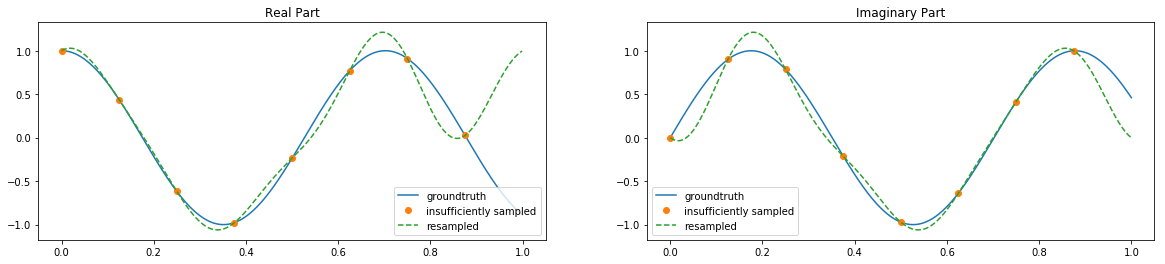

In [7]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.plot(t_highres, np.real(y_highres), label="groundtruth")
plt.plot(t_samples, np.real(y_samples), linestyle='', marker="o", label="insufficiently sampled")
plt.plot(t_resamples, np.real(y_resamples), linestyle='--', label="resampled")
plt.legend()
plt.title("Real Part")

plt.subplot(1,2,2)
plt.plot(t_highres, np.imag(y_highres), label="groundtruth")
plt.plot(t_samples, np.imag(y_samples), linestyle='', marker="o", label="insufficiently sampled")
plt.plot(t_resamples, np.imag(y_resamples), linestyle='--', label="resampled")
plt.legend()
plt.title("Imaginary Part")

plt.show()

In [8]:
fvec_highres = np.linspace(-FS*100/2,FS*100/2,len(y_highres), endpoint=False)
fft_highres = np.fft.fftshift(np.fft.fft(y_highres)) / len(y_highres)

In [9]:
fvec_resamples = np.linspace(-FS*100/2,FS*100/2,len(y_resamples), endpoint=False)
fft_resamples = np.fft.fftshift(np.fft.fft(y_resamples)) / len(y_resamples)

In [10]:
fvec_longres = np.linspace(-FS/2,FS/2,len(y_longres), endpoint=False)
fft_longres = np.fft.fftshift(np.fft.fft(y_longres)) / len(y_longres)

In [11]:
fvec_samples = np.linspace(-FS/2,FS/2,len(y_samples), endpoint=False)
fft_samples = np.fft.fftshift(np.fft.fft(y_samples)) / len(y_samples)

In [16]:
fvec_fineshift = np.linspace(-FS/2,FS/2,len(y_longres), endpoint=False)
t = np.linspace(0,DURATION,len(y_samples), endpoint=False)
fft_fineshift = []
for f in fvec_fineshift:
    tone = np.exp(-2*np.pi*1.j*f*t)
    fft_fineshift.append(np.sum( tone * y_samples)/len(y_samples))

Here we show the results of DFT of various representation of the same signal.

In blue is the groundtruth DFT. It is supposed to be a delta peak but there is still some linewidth as I did not perform FFT with an infinitely long signal. 

In orange is the DFT of the sampled signal. Notice how the peak is broad because there is energy spillage between the main DFT point and side points.

In green is the DFT of the resampled signal. It is exactly the same as the DFT of the sampled signal (orange), but with zeros in the extra frequency bins. Essentially, resampling does not help increase frequency resolution of DFT. No new information is added.

In red is the DFT of the same signal with the same duration but highly oversampled. Again there is no increase in the frequency resolution because the signal duration is similarly short. It still has a broad peak and agrees with the original signal (orange) near the low frequencies, but starts to differ at the higher frequencies. 

In purple is the fine scan of DFT. Note that the peak is always correct. But our FFT points may not always land on the peak. The case shown here is near maximum scalloping loss

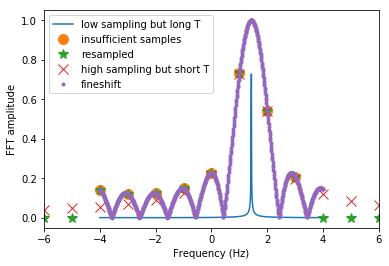

In [13]:
plt.plot(fvec_longres, np.abs(fft_longres),  markersize=10, label="low sampling but long T")
plt.plot(fvec_samples, np.abs(fft_samples), linestyle='', marker="o", markersize=10, label="insufficient samples")
plt.plot(fvec_resamples, np.abs(fft_resamples), linestyle='', marker='*',  markersize=10,label="resampled")
plt.plot(fvec_highres, np.abs(fft_highres), linestyle='', marker='x', markersize=10, label="high sampling but short T")
plt.plot(fvec_fineshift, np.abs(fft_fineshift), linestyle='', marker='.', linewidth=0.5, label="fineshift")


plt.xlim([-FS/2 - 2,FS/2+2])
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT amplitude")
plt.show()

In [14]:
# capon method
capon_fvec = np.linspace(-FS/2 - 1,FS/2+1,1000, endpoint=False)
a = np.einsum( 'i,j->ij', capon_fvec, t_samples)
a = np.exp(-2*np.pi*1j*a)

R = np.einsum('i,j->ij', y_samples, y_samples.conj())
inv_R_smallDL = np.linalg.inv(R+0.001*np.eye(len(R))) 
inv_power_smallDL = np.diag(np.matmul(a,np.matmul(inv_R_smallDL, a.conj().T)))

inv_R_largeDL = np.linalg.inv(R+0.1*np.eye(len(R))) 
inv_power_largeDL = np.diag(np.matmul(a,np.matmul(inv_R_largeDL, a.conj().T)))

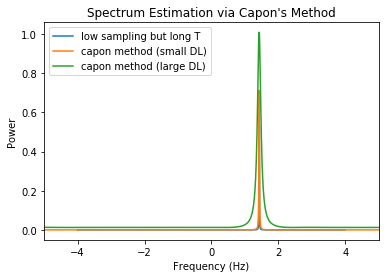

In [15]:
plt.plot(fvec_longres, np.abs(fft_longres)**2, label="low sampling but long T")
plt.plot(capon_fvec,np.abs(1/inv_power_smallDL), label="capon method (small DL)")
plt.plot(capon_fvec,np.abs(1/inv_power_largeDL), label="capon method (large DL)")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim([-FS/2 - 1,FS/2+1])
plt.title("Spectrum Estimation via Capon's Method")
plt.show()